# Boston House Price Prediction


#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml


#### Loading the dataset

In [10]:
boston = fetch_openml(name='boston', version=1)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target # Price in $1000s eg 24 = 24000$
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Information about the dataset

- 2 Categorical features
- 13 numerical features

#### Cleaning the dataset


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Converting *Categorical* features to *Numeric*



In [13]:
df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] = df['RAD'].astype(int)

In [18]:
summary = pd.DataFrame({
    'mean': df.mean(),
    'median': df.median(),
    'mode': df.mode().iloc[0], # mode is a dataframe so we use iloc[0] to get the first row
    'std': df.std()
})
summary

,mean,median,mode,std
CRIM,3.613524,0.25651,0.01501,8.601545
ZN,11.363636,0.00000,0.00000,23.322453
INDUS,11.136779,9.69000,18.10000,6.860353
CHAS,0.069170,0.00000,0.00000,0.253994
NOX,0.554695,0.53800,0.53800,0.115878
RM,6.284634,6.20850,5.71300,0.702617
AGE,68.574901,77.50000,100.00000,28.148861
DIS,3.795043,3.20745,3.49520,2.105710
RAD,9.549407,5.00000,24.00000,8.707259
TAX,408.237154,330.00000,666.00000,168.537116


#### Data Visualization

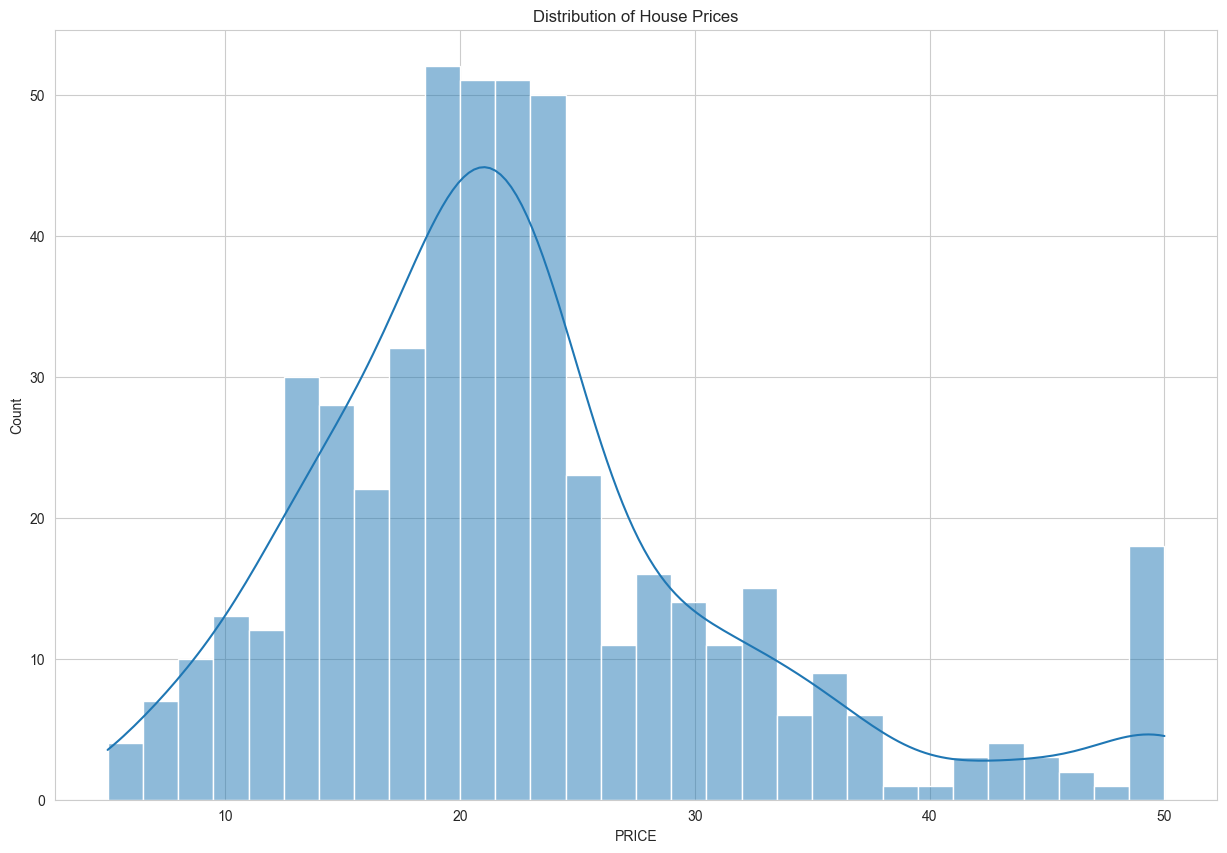

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()


Most Houses are around 20K $ in dataset


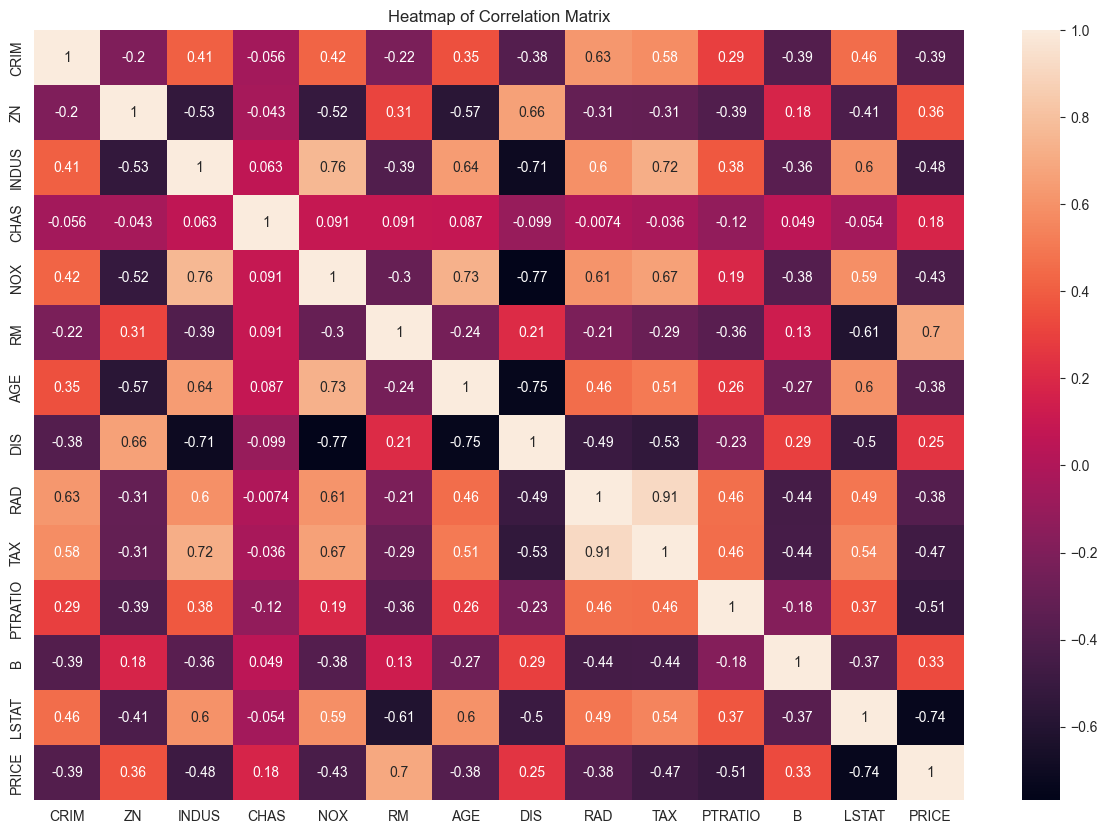

In [36]:
# Plot 2: Heat map of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


#### Most Important Columns
positively related to PRICE:
- RM (0.7): Number of rooms per house 
- B (0.33): Proportion of blacks by town
- ZN (0.18): Proportion of residential land zoned for lots over 25,000 sq. ft.

negatively related to PRICE:
- LSTAT (-0.74): Percentage of lower status population
- PTRATIO (-0.51): Pupil-teacher ratio by town
- INDUS (-0.48): Proportion of non-retail business acres per town



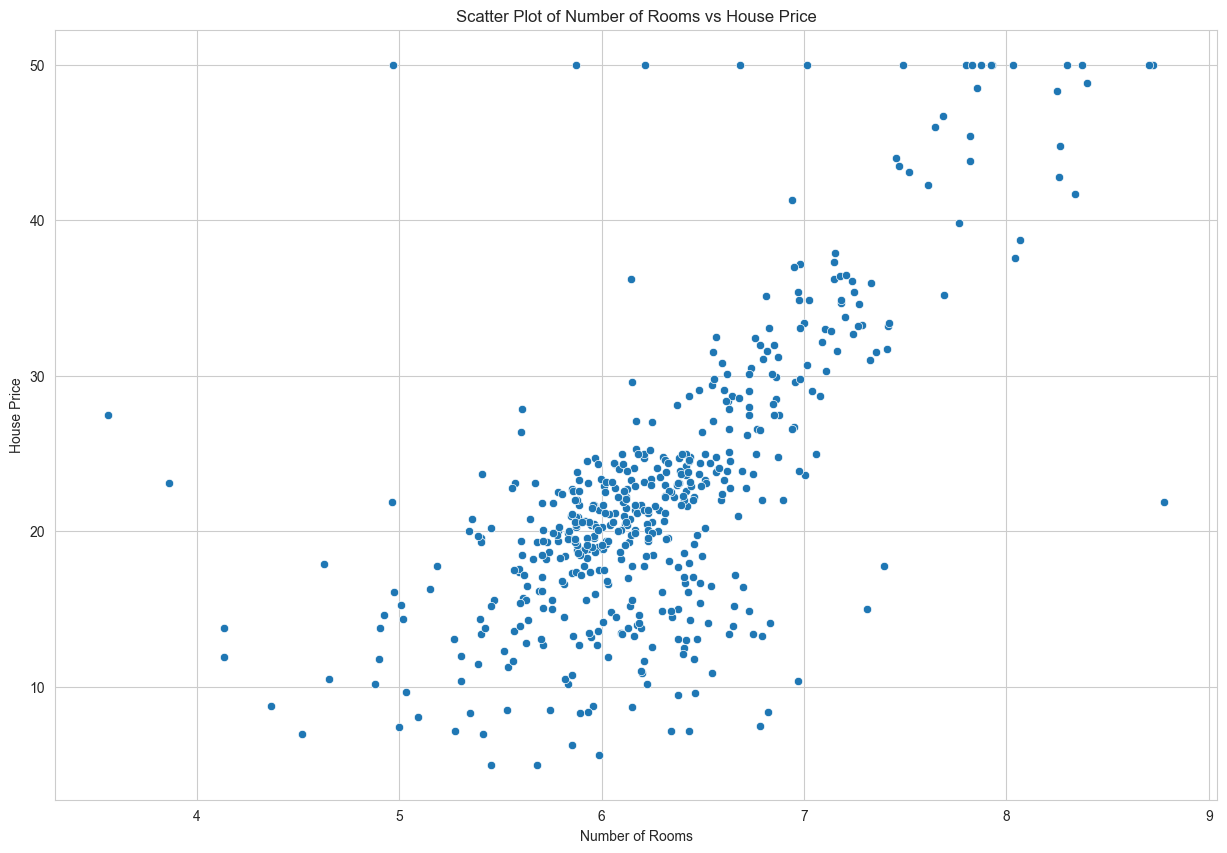

In [39]:
# Plot 3: Scatter plot of RM vs PRICE
plt.figure(figsize=(15, 10))
sns.scatterplot(x='RM', y='PRICE', data=df)
plt.title('Scatter Plot of Number of Rooms vs House Price')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price')
plt.show()


As Price and Num Room(RM) have the most positive co relation ie 0.7
we get to know from this plot that 
- As the number of rooms increases
- price  increase.


### Making Model

#### Splitting the dataset

In [52]:
X = df.drop('PRICE', axis=1)
y = df[['PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()
y_test.head()
X_test.head()
y_train.head()


,PRICE
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


In [46]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of X_train: 404
Length of X_test: 102
Length of y_train: 404
Length of y_test: 102


In [55]:
model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

In [59]:
y_pred = model.predict(X_test)
print(y_pred[0:5])


[[28.99672362]
 [36.02556534]
 [14.81694405]
 [25.03197915]
 [18.76987992]]


#### Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

accuracy = accuracy_score(y_test.round(), y_pred.round())
print(f'Accuracy: {accuracy*100}%')

Mean Squared Error: 24.291119474973538
R^2 Score: 0.6687594935356317
Accuracy: 16.666666666666664%


16% Accuracy 
😂

In [77]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)
rf_y_pred = model1.predict(X_test)
rf_accuracy = accuracy_score(y_test.round(), rf_y_pred.round())
print(f'Random Forest Accuracy: {rf_accuracy*100}%')

model2 = XGBRegressor(random_state=42)
model2.fit(X_train, y_train)
xgb_y_pred = model2.predict(X_test)
xgb_accuracy = accuracy_score(y_test.round(), xgb_y_pred.round())
print(f'XGBoost Accuracy: {xgb_accuracy*100}%')


c:\Users\raahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 11.76470588235294%
XGBoost Accuracy: 22.54901960784314%


In [87]:
test_values = [[0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]]

linear_pred = model.predict(test_values)
print(f"Linear Regression Prediction: {int(linear_pred)}000$")

rf_pred = model1.predict(test_values)
print(f"Random Forest Prediction: {int(rf_pred)}000$")

xgb_pred = model2.predict(test_values)
print(f"XGBoost Prediction: {int(xgb_pred)}000$")

Linear Regression Prediction: 25000$
Random Forest Prediction: 28000$
XGBoost Prediction: 25000$


C:\Users\raahi\AppData\Local\Temp\ipykernel_1404\3087247604.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Linear Regression Prediction: {int(linear_pred)}000$")
c:\Users\raahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\raahi\AppData\Local\Temp\ipykernel_1404\3087247604.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Random Forest Prediction: {int(rf_pred)}000$")
C:\Users\raahi\AppData\Local\Temp\ipykernel_1404\3087247604.py:10: DeprecationWarning: 